# importing libraries

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# creation dataset

In [14]:
# Define the dataset
data = {
    'Party': [
        'Bharatiya Janata Party - BJP', 'Indian National Congress - INC', 'Samajwadi Party - SP',
        'All India Trinamool Congress - AITC', 'Dravida Munnetra Kazhagam - DMK', 'Telugu Desam - TDP',
        'Janata Dal (United) - JD(U)', 'Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT',
        'Nationalist Congress Party - Sharadchandra Pawar - NCPSP', 'Shiv Sena - SHS',
        'Lok Janshakti Party(Ram Vilas) - LJPRV', 'Yuvajana Sramika Rythu Congress Party - YSRCP',
        'Rashtriya Janata Dal - RJD', 'Communist Party of India (Marxist) - CPI(M)',
        'Indian Union Muslim League - IUML', 'Aam Aadmi Party - AAAP', 'Jharkhand Mukti Morcha - JMM',
        'Janasena Party - JnP', 'Communist Party of India (Marxist-Leninist) (Liberation) - CPI(ML)(L)',
        'Janata Dal (Secular) - JD(S)', 'Viduthalai Chiruthaigal Katchi - VCK', 'Communist Party of India - CPI',
        'Rashtriya Lok Dal - RLD', 'Jammu & Kashmir National Conference - JKN', 'United Peoples Party, Liberal - UPPL',
        'Asom Gana Parishad - AGP', 'Hindustani Awam Morcha (Secular) - HAMS', 'Kerala Congress - KEC',
        'Revolutionary Socialist Party - RSP', 'Nationalist Congress Party - NCP', 'Voice of the People Party - VOTPP',
        'Zoram Peoples Movement - ZPM', 'Shiromani Akali Dal - SAD', 'Rashtriya Loktantrik Party - RLTP',
        'Bharat Adivasi Party - BHRTADVSIP', 'Sikkim Krantikari Morcha - SKM', 'Marumalarchi Dravida Munnetra Kazhagam - MDMK',
        'Aazad Samaj Party (Kanshi Ram) - ASPKR', 'Apna Dal (Soneylal) - ADAL', 'AJSU Party - AJSUP',
        'All India Majlis-E-Ittehadul Muslimeen - AIMIM', 'Independent - IND', 'Total'
    ],
    'Seats': [
        240, 99, 37, 29, 22, 16, 12, 9, 8, 7, 5, 4, 4, 4, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 543],
    'Other': [0] * 43
}


# define dataframes

In [15]:
# Load the dataset into a DataFrame
df = pd.DataFrame(data)
df = df[:-1]  # Remove the 'Total' row for clustering

# Select features for clustering
X = df[['Seats', 'Other']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# implementation of various types of clustering

In [16]:
# K-means Clustering
kmeans = KMeans(n_clusters=3)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

# Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3)
df['Agglo_Cluster'] = agglo.fit_predict(X_scaled)

# DBSCAN Clustering
dbscan = DBSCAN(eps=1.5, min_samples=2)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

# Print the dataframe with clusters
print(df)

                                                Party  Seats  Other  \
0                        Bharatiya Janata Party - BJP    240      0   
1                      Indian National Congress - INC     99      0   
2                                Samajwadi Party - SP     37      0   
3                 All India Trinamool Congress - AITC     29      0   
4                     Dravida Munnetra Kazhagam - DMK     22      0   
5                                  Telugu Desam - TDP     16      0   
6                         Janata Dal (United) - JD(U)     12      0   
7      Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT      9      0   
8   Nationalist Congress Party - Sharadchandra Paw...      8      0   
9                                     Shiv Sena - SHS      7      0   
10             Lok Janshakti Party(Ram Vilas) - LJPRV      5      0   
11      Yuvajana Sramika Rythu Congress Party - YSRCP      4      0   
12                         Rashtriya Janata Dal - RJD      4      0   
13    

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# plotting of clustered data for analysis

## k-means clustering

Text(0, 0.5, 'Other')

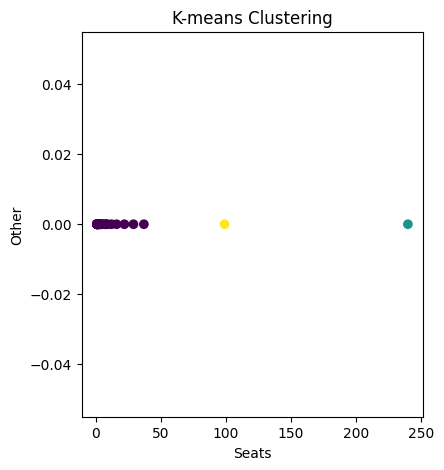

In [17]:
# Plot K-means Clustering
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(df['Seats'], df['Other'], c=df['KMeans_Cluster'], cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Seats')
plt.ylabel('Other')

## agglomerative clustering

Text(0, 0.5, 'Other')

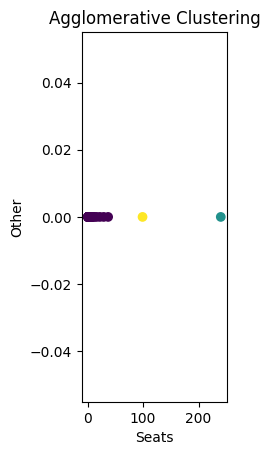

In [18]:
# Plot Agglomerative Clustering
plt.subplot(1, 3, 2)
plt.scatter(df['Seats'], df['Other'], c=df['Agglo_Cluster'], cmap='viridis')
plt.title('Agglomerative Clustering')
plt.xlabel('Seats')
plt.ylabel('Other')

## DBSCAN clustering

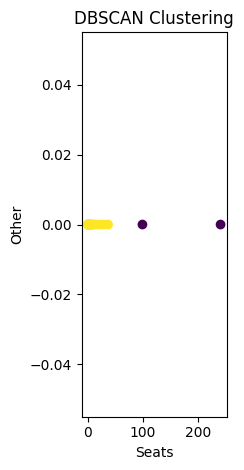

In [19]:
# Plot DBSCAN Clustering
plt.subplot(1, 3, 3)
plt.scatter(df['Seats'], df['Other'], c=df['DBSCAN_Cluster'], cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Seats')
plt.ylabel('Other')
plt.tight_layout()
plt.show()

## agglomerative clustering

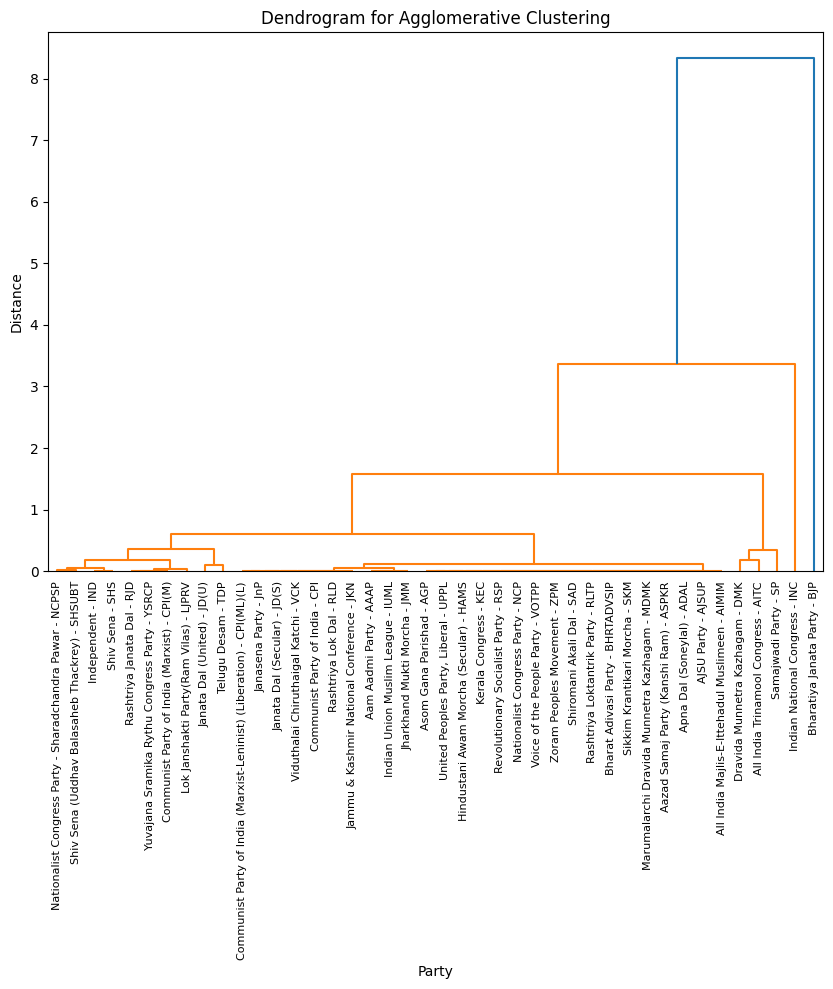

In [20]:
# Plot Dendrogram for Agglomerative Clustering
linked = linkage(X_scaled, 'ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, labels=df['Party'].values, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Party')
plt.ylabel('Distance')
plt.show()